# Penguin dataset
zdroj: https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset

In [3]:
import numpy as np

In [6]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

!kaggle datasets download -d ashkhagan/palmer-penguins-datasetalternative-iris-dataset -p {'.'}


  0%|          | 0.00/2.87k [00:00<?, ?B/s]
100%|##########| 2.87k/2.87k [00:00<00:00, 1.64MB/s]


In [7]:
import zipfile

dataset_path = '/content/data_preparation_exercise/'

with zipfile.ZipFile('palmer-penguins-datasetalternative-iris-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [8]:
import pandas as pd

csv_filepath = dataset_path + 'penguins.csv'
df = pd.read_csv(csv_filepath)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## První pohled na data a missing values


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Máme celkem 344 pozorování -- NaN hodnoty jsou ve sloupcích `bill-length`, `bill-depth`, `flipper_lenght`, `body_mass` a `sex`. Zobrazíme si je a zkusíme s nimi něco udělat.

In [7]:
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Vidíme, že pozorování 3 a 271 chybí všechny hodnoty. Tato pozorování můžeme úplně smazat, jelikož mají nulovou vypovídající hodnotu.

In [10]:
df2 = df.drop(3)
df2 = df2.drop(271)
nans=df2[df2.isna().any(axis=1)]

Teď nám zbývá pouze 9 pozorování, u kterých chybí pohlaví tučňáků. Zkusíme pohlaví odhadnout na základě druhu tučňáka a jeho hmotnosti. Průměrná hmotnost samice bude předpokládaně nižsí než hmotnost samce. Musíme ale brát v úvahu, že tímto už do datasetu zanášíme chyby.

In [11]:
AF = np.mean(df2.query('species == "Adelie" and sex == "female"')["body_mass_g"])
AM = np.mean(df2.query('species == "Adelie" and sex == "male"')["body_mass_g"])
print(AF, AM)

GF = np.mean(df2.query('species == "Gentoo" and sex == "female"')["body_mass_g"])
GM = np.mean(df2.query('species == "Gentoo" and sex == "male"')["body_mass_g"])
print(GF, GM)

3368.8356164383563 4043.4931506849316
4679.741379310345 5484.836065573771


In [12]:
def insert_sex(species, mass):
  if species=="Adelie":
    if abs(mass-AF) > abs(mass-AM):
      return "male"
    else:
      return "female"
  if species=="Gentoo":
    if abs(mass-GF) > abs(mass-GM):
      return "male"
    else:
      return "female"
  return np.nan

In [13]:
insert_sex("Adelie", 4250)
for index, obs in nans.iterrows():
    df2.loc[index,"sex"] = insert_sex(obs["species"], obs["body_mass_g"])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.5+ KB


Vidíme, že už v datasetu nemáme žádné další NaN hodnoty. Ještě zkontrolujeme přítomnost duplicit.

In [15]:
df2.loc[df2.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


# Data exploration

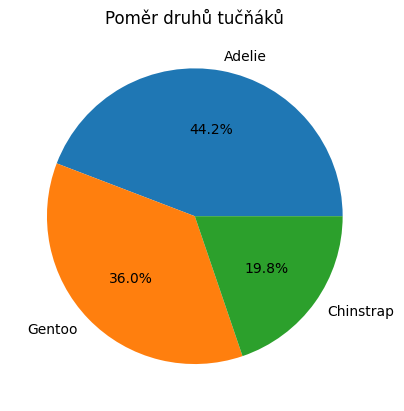

In [16]:
import matplotlib.pyplot as plt

plt.pie(df['species'].value_counts().values, labels=df['species'].value_counts().index, autopct='%.1f%%')
plt.title("Poměr druhů tučňáků")
plt.show()

Největší zastoupení je u druhu Adelie, nejmenší u Chinstrap.

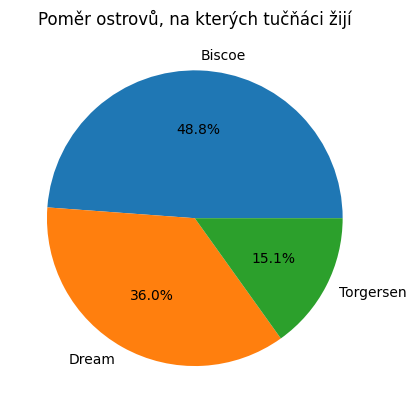

In [17]:
plt.pie(df['island'].value_counts().values, labels=df['island'].value_counts().index, autopct='%.1f%%')
plt.title("Poměr ostrovů, na kterých tučňáci žijí")
plt.show()

Z vybraných tučnáků jich nejvíce žije na ostrově Biscoe.

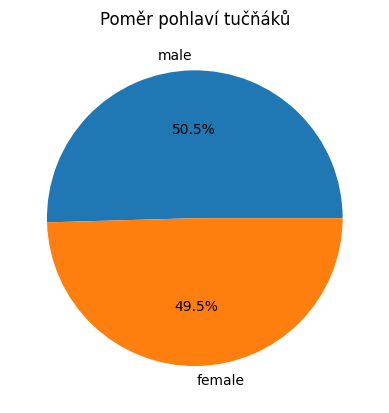

In [18]:
plt.pie(df['sex'].value_counts().values, labels=df['sex'].value_counts().index, autopct='%.1f%%')
plt.title("Poměr pohlaví tučňáků")
plt.show()

Poměr samců a samic je přibližně vyrovnaný.

<Axes: title={'center': 'Ostrovy v závislosti na druhu'}, xlabel='island', ylabel='Count'>

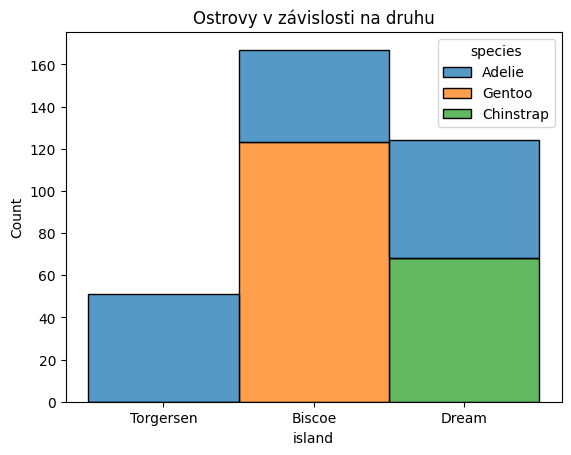

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Ostrovy v závislosti na druhu")
sns.histplot(data=df2, x="island", hue="species", multiple = "stack")


<Axes: title={'center': 'Druhy v závislosti na pohlaví'}, xlabel='species', ylabel='Count'>

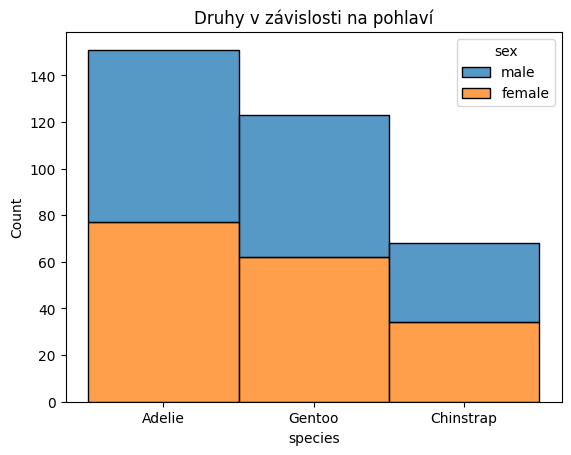

In [23]:
plt.title("Druhy v závislosti na pohlaví")
sns.histplot(data=df2, x="species", hue="sex", multiple = "stack")

<Axes: title={'center': 'Délka zobáku'}, xlabel='bill_length_mm', ylabel='Count'>

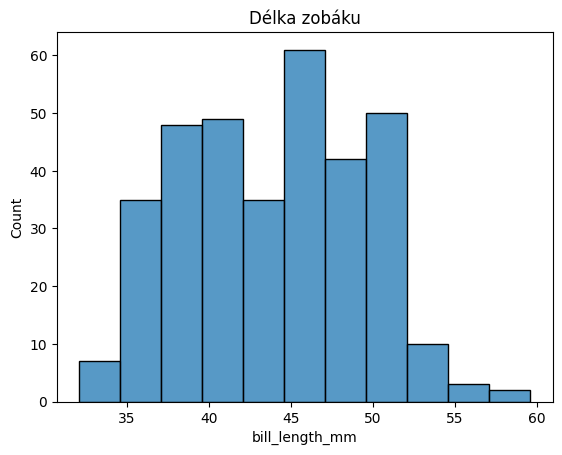

In [18]:
plt.title("Délka zobáku")
sns.histplot(data=df2, x="bill_length_mm")

In [ ]:
Délka zobáku by mohla splňovat normalitu.

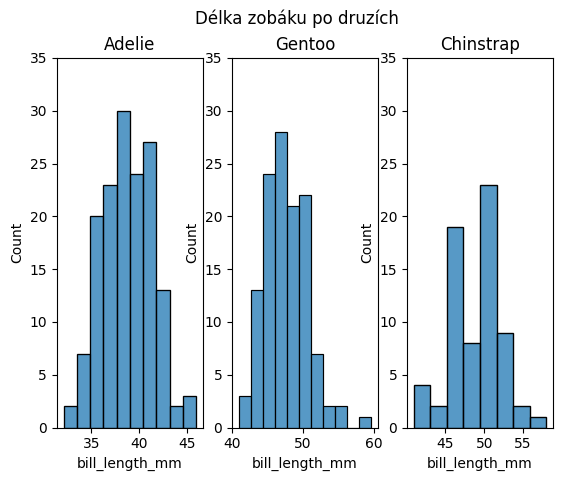

In [107]:
plt.suptitle("Délka zobáku po druzích")
plt.subplot(1, 3, 1)
plt.ylim(0,35)
plt.title("Adelie")
sns.histplot(data=df2.query('species == "Adelie"'), x="bill_length_mm")
plt.subplot(1, 3, 2)
plt.title("Gentoo")
plt.ylim(0,35)
sns.histplot(data=df2.query('species == "Gentoo"'), x="bill_length_mm")
plt.subplot(1, 3, 3)
plt.title("Chinstrap")
plt.ylim(0,35)
sns.histplot(data=df2.query('species == "Chinstrap"'), x="bill_length_mm")

plt.show()

In [ ]:
Druh Chinstrap má obecně kratší zobák než ostatní dva druhy.

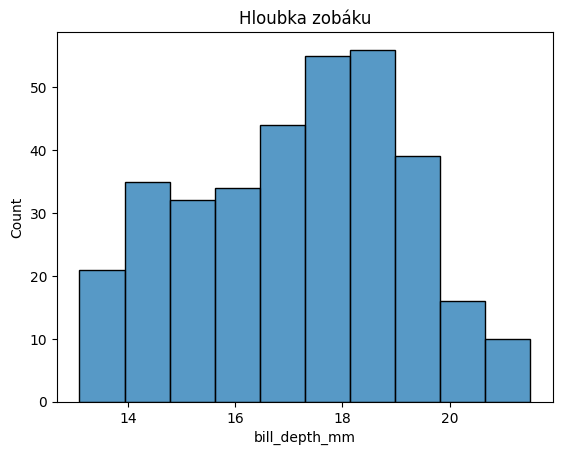

In [110]:
plt.title("Hloubka zobáku")
sns.histplot(data=df2, x="bill_depth_mm")
plt.show()

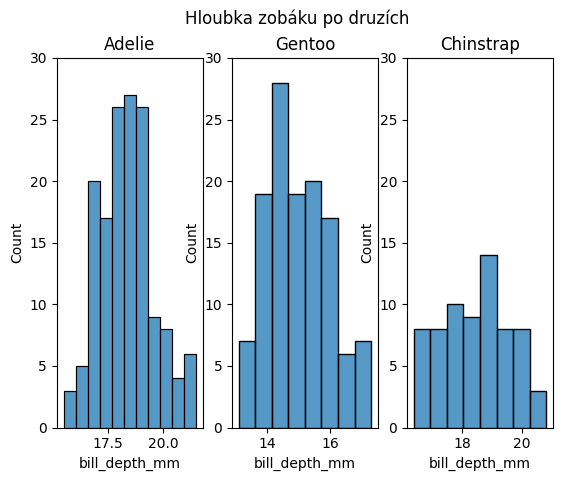

In [111]:
plt.suptitle("Hloubka zobáku po druzích")
plt.subplot(1, 3, 1)
plt.ylim(0,30)
plt.title("Adelie")
sns.histplot(data=df2.query('species == "Adelie"'), x="bill_depth_mm")
plt.subplot(1, 3, 2)
plt.title("Gentoo")
plt.ylim(0,30)
sns.histplot(data=df2.query('species == "Gentoo"'), x="bill_depth_mm")
plt.subplot(1, 3, 3)
plt.title("Chinstrap")
plt.ylim(0,30)
sns.histplot(data=df2.query('species == "Chinstrap"'), x="bill_depth_mm")

plt.show()

In [ ]:
Druh Chinstrap má také menší hloubku zobáku než ostatní dva druhy.

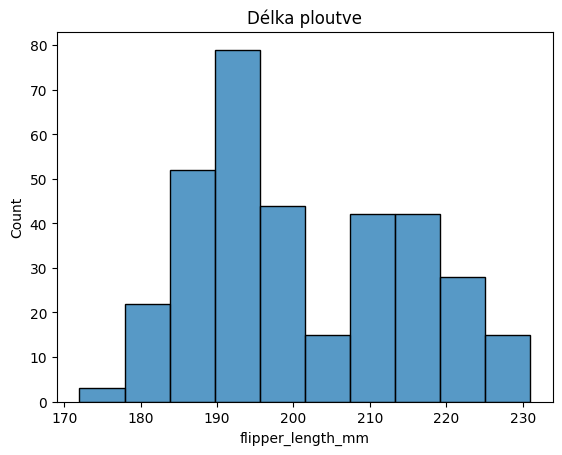

In [115]:
plt.title("Délka ploutve")
sns.histplot(data=df2, x="flipper_length_mm")
plt.show()

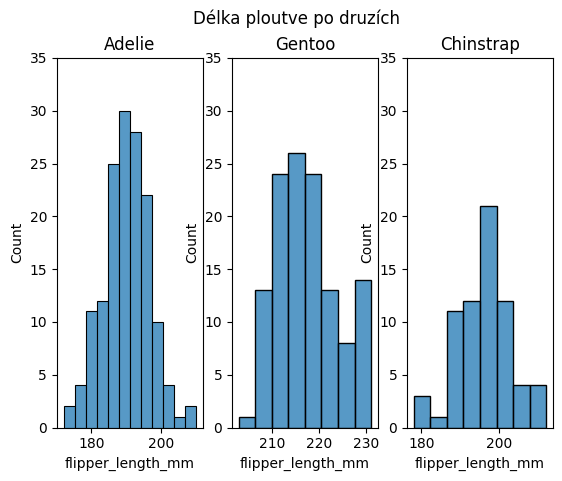

In [114]:
plt.suptitle("Délka ploutve po druzích")
plt.subplot(1, 3, 1)
plt.ylim(0,35)
plt.title("Adelie")
sns.histplot(data=df2.query('species == "Adelie"'), x="flipper_length_mm")
plt.subplot(1, 3, 2)
plt.title("Gentoo")
plt.ylim(0,35)
sns.histplot(data=df2.query('species == "Gentoo"'), x="flipper_length_mm")
plt.subplot(1, 3, 3)
plt.title("Chinstrap")
plt.ylim(0,35)
sns.histplot(data=df2.query('species == "Chinstrap"'), x="flipper_length_mm")

plt.show()

In [ ]:
Druh Adelie má nejdelší ploutve, druh Chinstrap nejkratší.

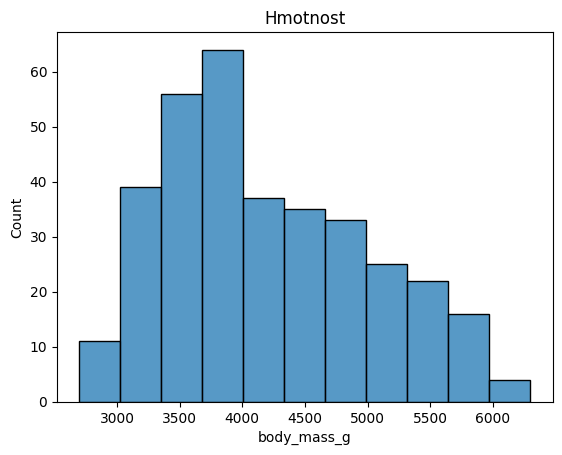

In [116]:
plt.title("Hmotnost")
sns.histplot(data=df2, x="body_mass_g")
plt.show()

In [ ]:
Proměnná hmotnost je zřejmě kladně zešikmená.

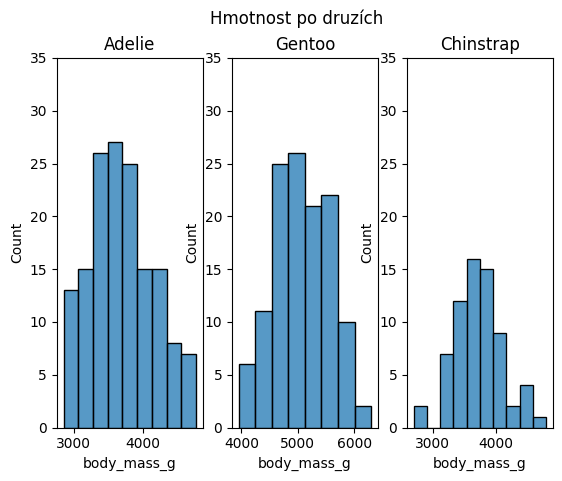

In [118]:
plt.suptitle("Hmotnost po druzích")
plt.subplot(1, 3, 1)
plt.ylim(0,35)
plt.title("Adelie")
sns.histplot(data=df2.query('species == "Adelie"'), x="body_mass_g")
plt.subplot(1, 3, 2)
plt.title("Gentoo")
plt.ylim(0,35)
sns.histplot(data=df2.query('species == "Gentoo"'), x="body_mass_g")
plt.subplot(1, 3, 3)
plt.title("Chinstrap")
plt.ylim(0,35)
sns.histplot(data=df2.query('species == "Chinstrap"'), x="body_mass_g")

plt.show()